neg_mean_absolute_error
ET: -66.454495 (6.039751)
RF: -47.912818 (4.992498)
CatB: -47.222157 (3.346325)
lgbm: -47.497638 (4.467572)
xgb: -51.442958 (4.802784)
ridge: -48.466675 (5.265634)
GBC: -47.985578 (4.561514)
ADA: -47.511728 (5.763399)
lasso: -52.887816 (4.957390)
lars: -51.354582 (11.376595)
llars: -52.887792 (4.957393)
br: -44.258941 (5.333702)
lr: -44.223084 (5.744751)
hr: -44.269636 (5.651458)
par: -46.117839 (4.725676)
omp: -51.897413 (5.048751)
KNN: -48.126646 (4.271989)
en: -65.672002 (7.551272)
dummy: -65.948459 (7.583018)


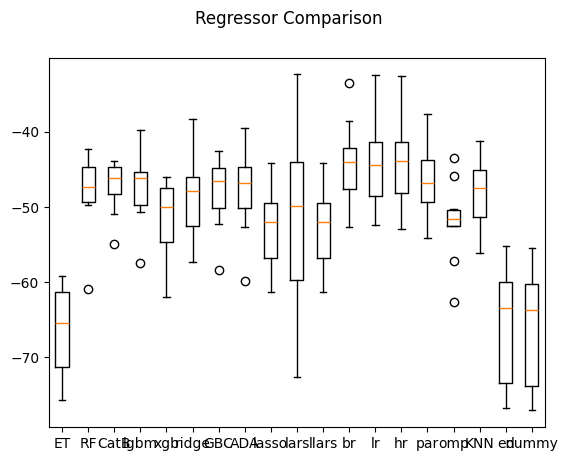

In [2]:

# Compare Algorithms
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import AdaBoostRegressor
from sklearn import linear_model
from sklearn.linear_model import HuberRegressor, LinearRegression
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet
from sklearn.dummy import DummyRegressor
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
#Load Dataset
x_data, y_data = load_diabetes(return_X_y=True)
x_data = pd.DataFrame(x_data.astype('float64'))
# append models
models = []
models.append(('ET', ExtraTreeRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('CatB', CatBoostRegressor(verbose=False)))
models.append(('lgbm', LGBMRegressor(verbose=-1)))
models.append(('xgb', XGBRegressor()))
models.append(('ridge',  Ridge()))
models.append(('GBC',  GradientBoostingRegressor()))
models.append(('ADA',  AdaBoostRegressor()))
models.append(('lasso', linear_model.Lasso()))
models.append(('lars', linear_model.Lars()))
models.append(('llars', linear_model.LassoLars()))
models.append(('br', linear_model.BayesianRidge()))
models.append(('lr', LinearRegression()))
models.append(('hr', HuberRegressor()))
models.append(('par', PassiveAggressiveRegressor()))
models.append(('omp', OrthogonalMatchingPursuit()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('en', ElasticNet()))
models.append(('dummy', DummyRegressor()))
results = []
results_std = []
names = []
scoring = 'neg_mean_absolute_error'
print(scoring)
# Set Cross-Validation
kfold = model_selection.KFold(n_splits=10, random_state=None)
for name, model in models:   
    cv_results = model_selection.cross_val_score(model, x_data, y_data, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    #results_std.append(cv_results.std())
    mean_scoring = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(mean_scoring)
# Create a Dataframe with the results for possible later processing
#df_SpotonCheck = pd.DataFrame({'name': names, 'mae': results, 'Std': results_std})
# Regressor Comparision Boxplot
fig = plt.figure()
fig.suptitle('Regressor Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
